In [ ]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,1,101)
m = GEKKO(remote=False); m.time=t

d = m.Param(np.cos(2*np.pi*t)+3)
g = m.Var(d[0])
J  = m.CV(0)
J.STATUS=1; J.SPHI=J.SPLO=0
J.WSPHI=1000; J.WSPLO=1
r = m.MV(0,lb=-1,ub=1); r.STATUS=1
m.Equations([g.dt()==r, J==d-g])
m.options.IMODE=6; m.solve()

plt.plot(t,g,'b:',label='Production')
plt.plot(t,d,'r-',label='Demand')
plt.plot(t,r,'k--',label='Ramp Rate')
plt.legend(); plt.grid(); plt.show()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  6
   Intermediates:  1
   Connections  :  0
   Equations    :  4
   Residuals    :  3
 
 Number of state variables:    3100
 Number of total equations: -  3000
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
       

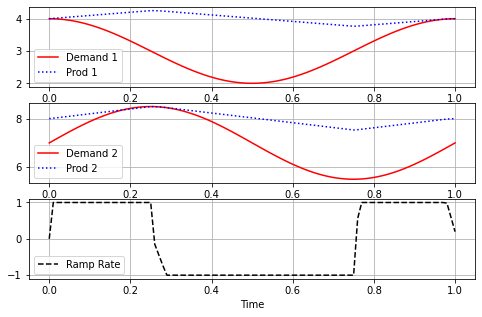

In [1]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,1,101)
m = GEKKO(remote=False); m.time=t

d1  = m.Param(np.cos(2*np.pi*t)+3)
d2  = m.Param(1.5*np.sin(2*np.pi*t)+7)
g1  = m.Var(d1[0]); g2 = m.Intermediate(g1*2)

J1  = m.CV(0); J1.STATUS=1; J1.SPHI=J1.SPLO=0; J1.WSPHI=1000; J1.WSPLO=1
J2  = m.CV(0); J2.STATUS=1; J2.SPHI=J2.SPLO=0; J2.WSPHI=1000; J2.WSPLO=1
r = m.MV(0,lb=-1,ub=1); r.STATUS=1

m.Equations([g1.dt()==r, J1==d1-g1, J2==d2-g2])

m.options.IMODE=6; m.solve()

plt.figure(figsize=(8,5))
plt.subplot(3,1,1)
plt.plot(t,d1,'r-',label='Demand 1')
plt.plot(t,g1,'b:',label='Prod 1')
plt.grid(); plt.legend()
plt.subplot(3,1,2)
plt.plot(t,d2,'r-',label='Demand 2')
plt.plot(t,g2,'b:',label='Prod 2')
plt.grid(); plt.legend()
plt.subplot(3,1,3)
plt.plot(t,r,'k--',label='Ramp Rate')
plt.grid(); plt.legend(); plt.xlabel('Time')
plt.show()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  12
   Intermediates:  3
   Connections  :  0
   Equations    :  11
   Residuals    :  8
 
 Number of state variables:    5200
 Number of total equations: -  5000
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    200
 
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  9.01361E+02  1.00000E+00
    1  2.94810E+02  1.34008E-02
    2  2.94626E+02  3.47576E-01
    3  2.94626E+02  5.00000E-10
    4  2.94626E+02  2.38524E-16
    5  2.94626E+02  2.38524E-16
 Successful solution
 
 -----------------------------

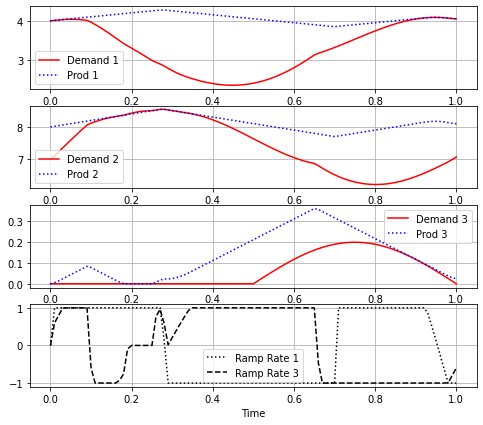

In [2]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

t = np.linspace(0,1,101)
m = GEKKO(remote=False); m.time=t

d1 = m.Param(np.cos(2*np.pi*t)+3)
d2 = m.Param(1.5*np.sin(2*np.pi*t)+7)
d3 = m.Param(np.clip(-0.2*np.sin(2*np.pi*t),0,None))
d1v = m.Var(d1[0]); d2v=m.Intermediate(d1v*2)
d3v = m.Var(0,lb=0); d3v1=m.Var(0); d3v2=m.Var(0)
t1 = m.Intermediate(d1+d3v1); t2 = m.Intermediate(d2+d3v2)

e  = m.CV(0); e.STATUS=1; e.SPHI=e.SPLO=0; e.WSPHI=1000; e.WSPLO=1
h  = m.CV(0); h.STATUS=1; h.SPHI=h.SPLO=0; h.WSPHI=1000; h.WSPLO=1
z  = m.CV(0); z.STATUS=1; z.SPHI=z.SPLO=0; z.WSPHI=1000; z.WSPLO=1
r1 = m.MV(0,lb=-1,ub=1); r1.STATUS=1; r1.DCOST=0.0
r3 = m.MV(0,lb=-1,ub=1); r3.STATUS=1; r3.DCOST=0.0

m.Equations([d1v.dt()==r1, e==t1-d1v, h==t2-d2v])
m.Equations([d3v.dt()==r3, z==d3-d3v, d3v1==d3v*2, d3v2==d3v*3])
m.Maximize(d3v)

m.options.IMODE=6; m.options.SOLVER=1; m.solve()

plt.figure(figsize=(8,7))
plt.subplot(4,1,1)
plt.plot(t,t1,'r-',label='Demand 1')
plt.plot(t,d1v,'b:',label='Prod 1')
plt.legend(); plt.grid()
plt.subplot(4,1,2)
plt.plot(t,t2,'r-',label='Demand 2')
plt.plot(t,d2v,'b:',label='Prod 2')
plt.legend(); plt.grid()
plt.subplot(4,1,3)
plt.plot(t,d3,'r-',label='Demand 3')
plt.plot(t,d3v,'b:',label='Prod 3')
plt.legend(); plt.grid()
plt.subplot(4,1,4)
plt.plot(t,r1,'k:',label='Ramp Rate 1')
plt.plot(t,r3,'k--',label='Ramp Rate 3')
plt.legend(); plt.grid(); plt.xlabel('Time')
plt.show()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  1
   Constants    :  0
   Variables    :  9
   Intermediates:  0
   Connections  :  1
   Equations    :  7
   Residuals    :  7
 
 Number of state variables:    1601
 Number of total equations: -  1401
 Number of slack variables: -  400
 ---------------------------------------
 Degrees of freedom       :    -200
 
 * Warning: DOF <= 0
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  2.04522E+03  1.20000E+01
    1  2.04522E+03  4.17573E-10
    2  2.04522E+03  2.49800E-16
    3  2.04522E+03  2.49800E-16
 Successful solution
 
 ---------------------------------------------------
 Solver         :  

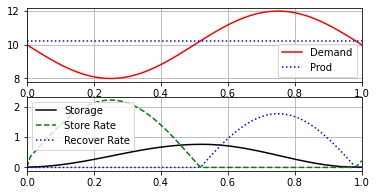

In [3]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

m = GEKKO(remote=False)
m.time = np.linspace(0,1,101)

g = m.FV(); g.STATUS = 1 # production
s = m.Var(1e-2, lb=0)    # storage inventory
store = m.Var()          # store energy rate
s_in = m.Var(lb=0)       # store slack variable
recover = m.Var()        # recover energy rate
s_out = m.Var(lb=0)         # recover slack variable
eta = 0.7
d = m.Param(-2*np.sin(2*np.pi*m.time)+10)
m.periodic(s)
m.Equations([g + recover/eta - store >= d,
             g - d == s_out - s_in,
             store == g - d + s_in,
             recover == d - g + s_out,
             s.dt() == store - recover/eta,
             store * recover <= 0])
m.Minimize(g)

m.options.SOLVER   = 1
m.options.IMODE    = 6
m.options.NODES    = 3
m.solve()

plt.figure(figsize=(6,3))
plt.subplot(2,1,1)
plt.plot(m.time,d,'r-',label='Demand')
plt.plot(m.time,g,'b:',label='Prod')
plt.legend(); plt.grid(); plt.xlim([0,1])

plt.subplot(2,1,2)
plt.plot(m.time,s,'k-',label='Storage')
plt.plot(m.time,store,'g--', label='Store Rate')
plt.plot(m.time,recover,'b:', label='Recover Rate')
plt.legend(); plt.grid(); plt.xlim([0,1])
plt.show()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  1
   Constants    :  0
   Variables    :  11
   Intermediates:  1
   Connections  :  1
   Equations    :  10
   Residuals    :  9
 
 Number of state variables:    2600
 Number of total equations: -  2401
 Number of slack variables: -  100
 ---------------------------------------
 Degrees of freedom       :    99
 
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.49350E+07  1.00000E+00
    1  5.64217E+04  9.75444E-01
    2  4.10493E+10  7.54209E-01
    3  5.61210E+06  8.83496E-01
    4  1.64131E+05  8.34675E-01
    5  2.46645E+09  8.54487E-01
    6  2.67067E+13  8.41479E-01
    7  5.81670E+08  

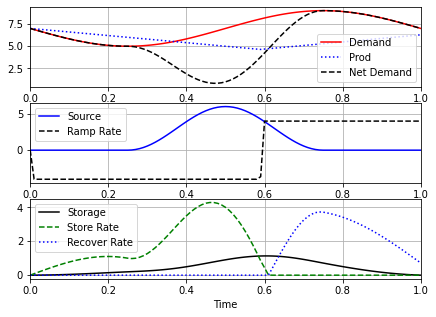

In [4]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

m = GEKKO(remote=False)
m.time = np.linspace(0,1,101)

# renewable energy source
renewable = 3*np.cos(np.pi*m.time/6*24)+3
num = len(m.time)
center = np.ones(num)
center[0:int(num/4)] = 0
center[-int(num/4):] = 0
renewable *= center
r = m.Param(renewable)

dg = m.MV(0, lb=-4, ub=4); dg.STATUS = 1
d = m.Param(-2*np.sin(2*np.pi*m.time)+7)
net = m.Intermediate(d-r)
g = m.Var(d[0])       # production
s = m.Var(0, lb=0)    # storage inventory
store = m.Var()       # store energy rate
s_in = m.Var(lb=0)    # store slack variable
recover = m.Var()     # recover energy rate
s_out = m.Var(lb=0)   # recover slack variable
m.periodic(s)
eta = 0.85            # storage efficiency
m.Minimize(g)

err = m.CV(0); err.STATUS = 1
err.SPHI = err.SPLO = 0
err.WSPHI = 1000; err.WSPLO = 1
m.Minimize(0.01*err**2)

m.Equations([g.dt() == dg,  
             err == d - g - r + recover/eta - store,
             g + r - d == s_out - s_in,
             store == g + r - d + s_in,
             recover == d - g - r + s_out,
             s.dt() == store - recover/eta,
             store * recover <= 0])

m.options.SOLVER   = 1
m.options.IMODE    = 6
m.options.NODES    = 2
m.solve()

plt.figure(figsize=(7,5))
plt.subplot(3,1,1)
plt.plot(m.time,d,'r-',label='Demand')
plt.plot(m.time,g,'b:',label='Prod')
plt.plot(m.time,net,'k--',label='Net Demand')
plt.legend(); plt.grid(); plt.xlim([0,1])

plt.subplot(3,1,2)
plt.plot(m.time,r,'b-',label='Source')
plt.plot(m.time,dg,'k--',label='Ramp Rate')
plt.legend(); plt.grid(); plt.xlim([0,1])

plt.subplot(3,1,3)
plt.plot(m.time,s,'k-',label='Storage')
plt.plot(m.time,store,'g--', label='Store Rate')
plt.plot(m.time,recover,'b:', label='Recover Rate')
plt.xlim([0,1]); plt.xlabel('Time')
plt.legend(); plt.grid()
plt.show()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  1
   Constants    :  0
   Variables    :  20
   Intermediates:  2
   Connections  :  1
   Equations    :  17
   Residuals    :  15
 
 Number of state variables:    3200
 Number of total equations: -  2901
 Number of slack variables: -  400
 ---------------------------------------
 Degrees of freedom       :    -101
 
 * Warning: DOF <= 0
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Pu

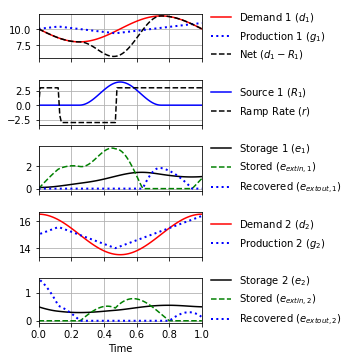

In [5]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

m = GEKKO(remote=False)
t = np.linspace(0, 1, 101)
m.time = t

m.options.SOLVER = 3
m.options.IMODE = 6 
m.options.NODES = 2 
m.options.CV_TYPE = 1
m.options.MAX_ITER = 1000

p = m.SV(10)         # production (constant)
s = m.Var(0.1, lb=0) # storage inventory
stored = m.SV()      # store energy rate
recovery = m.SV()    # recover energy rate
vx = m.SV(lb=0)      # recover slack variable
vy = m.SV(lb=0)      # store slack variable

eps = 0.85 # Storage efficiency

d = m.MV((-20*np.sin(np.pi*t/12*24)+100)/10)
d_h = m.MV((15*np.cos(np.pi*t/12*24)+150)/10)

p_h_initial = m.Intermediate(p*1.5)

p_h = m.SV(p_h_initial)
s_h = m.Var(0.5,lb=0)
stored_h = m.SV()
recovery_h = m.SV()

#renewable energy source
renewable = (20*np.cos(np.pi*t/6*24)+20)/10 
center = np.ones(len(t))
num = len(t)
center[0:int(num/4)] = 0
center[-int(num/4):] = 0
renewable *= center
r = m.Param(renewable)

r1 = m.MV(ub=3,lb=-3)
r1.STATUS=1

m.periodic(s_h)

zx = m.SV(lb=0)
zy = m.SV(lb=0)

eps_h = 0.8 # heat storage efficiency

net = m.Intermediate(d-r)
m.Equations([p + r + recovery/eps - stored >= d,
             p + r - d == vx - vy,
             stored == p + r - d + vy,
             recovery == d - p - r + vx,
             s.dt() == stored - recovery/eps,
             p.dt() == r1,
             stored * recovery <= 0,
             p_h + recovery_h/eps_h - stored_h >= d_h,
             p_h - d_h == zx - zy,
             stored_h == p_h - d_h + zy,
             recovery_h == d_h - p_h + zx,
             s_h.dt() == stored_h - recovery_h/eps_h,
             stored_h * recovery_h <= 0,
             p_h == 1.5 * p])
m.Minimize(p)
m.solve()

# Plot solution
fig, axes = plt.subplots(5, 1, figsize=(5, 5.1), sharex=True)
axes = axes.ravel()

ax = axes[0]
ax.plot(t, d, 'r-', label='Demand 1 ($d_1$)')
ax.plot(t, p,'b:', label='Production 1 ($g_1$)',lw=2)
ax.plot(t, net, 'k--', label='Net ($d_1-R_1$)')

ax = axes[1]
ax.plot(t,r, 'b-',label='Source 1 ($R_1$)')
ax.plot(t,r1, 'k--', label='Ramp Rate ($r$)')

ax = axes[2]
ax.plot(t,s, 'k-', label='Storage 1 ($e_1$)')
ax.plot(t,stored,'g--',label='Stored ($e_{\text{in},1}$)')
ax.plot(t,recovery,'b:',label='Recovered ($e_{\text{out},1}$)',lw=2)

ax = axes[3]
ax.plot(t,d_h, 'r-', label='Demand 2 ($d_2$)')
ax.plot(t[1:], p_h.value[1:],'b:',\
        label='Production 2 ($g_2$)',lw=2)

ax = axes[4]
ax.plot(t,s_h, 'k-', label='Storage 2 ($e_2$)')
ax.plot(t,stored_h,'g--',label='Stored ($e_{\text{in},2}$)')
ax.plot(t[1:],recovery_h.value[1:],'b:',\
        label='Recovered ($e_{\text{out},2}$)',lw=2)
ax.set_xlabel('Time')

for ax in axes:
    ax.legend(loc='center left',\
              bbox_to_anchor=(1,0.5),frameon=False)
    ax.grid()
    ax.set_xlim(0, 1)
plt.tight_layout()
plt.savefig('grid_energy6.png', dpi=600,\
            bbox_inches = 'tight')
plt.show()